In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Train.csv")

In [5]:
df[0:2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [6]:
df.shape

(8523, 12)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
import numpy as np
w=np.mean(df['Item_Weight'])


In [9]:
df['Item_Weight'].fillna(w,inplace=True)

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df[0:2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [14]:
df1=df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)

In [15]:
df1[0:2]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228


In [16]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [17]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [18]:
f=l.fit_transform(df1['Item_Fat_Content'])

In [19]:
p=l.fit_transform(df1['Item_Type'])

In [20]:
df1[0:2]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228


In [21]:
df1['Fat']=f
df1['Product']=p

In [22]:
df1[0:2]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Fat,Product
0,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380,1,4
1,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228,2,14


In [23]:
df2=df1.drop(['Item_Fat_Content','Item_Type'],axis=1)
df2[0:3]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Fat,Product
0,9.30,0.016047,249.8092,3735.1380,1,4
1,5.92,0.019278,48.2692,443.4228,2,14
2,17.50,0.016760,141.6180,2097.2700,1,10


In [24]:
#Split the data
X=df2.drop("Item_Outlet_Sales",axis=1)

In [25]:
X[0:2]

,Item_Weight,Item_Visibility,Item_MRP,Fat,Product
0,9.30,0.016047,249.8092,1,4
1,5.92,0.019278,48.2692,2,14


In [26]:
y=df2['Item_Outlet_Sales']
y[0:2]

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#20% test size and 80% train shape

In [28]:
X_train.shape,y_train.shape

((4890, 5), (4890,))

In [29]:
X_test.shape,y_test.shape

((1223, 5), (1223,))

In [30]:
X_train[0:2],y_train[0:2]

(      Item_Weight  Item_Visibility  Item_MRP  Fat  Product
 7643        15.35         0.113678  189.7504    2        6
 2196        13.65         0.065898   46.1402    1        5,
 7643    2492.7552
 2196     459.4020
 Name: Item_Outlet_Sales, dtype: float64)

In [31]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)#Target Variable

LinearRegression()

In [32]:
sales=reg.predict(X_test)

In [33]:
sales#Predicted o/p

array([3257.52106738, 2024.46728622, 1363.83783498, ..., 2503.45164981,
       3099.78361706, 3205.0643441 ])

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(sales,y_test)

1930024.9629064358

In [35]:
r2_score(sales,y_test)

-0.8352884869487271

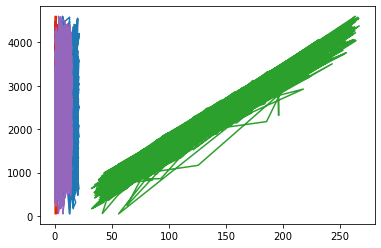

In [36]:
import matplotlib.pyplot as plt
plt.plot(X_test,sales)
plt.show()

In [37]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Fat,Product
6089,9.300000,0.043964,192.3846,1,7
6121,14.850000,0.053838,120.8072,2,0
789,8.710000,0.121149,93.7778,3,3
849,12.857645,0.114917,188.4214,2,6
3202,4.880000,0.134037,53.3298,2,0
...,...,...,...,...,...
1308,10.300000,0.030617,112.7176,2,6
5708,12.857645,0.025739,120.7440,1,15
5129,10.695000,0.086765,156.7972,2,13
3190,7.235000,0.099879,195.1452,1,13


In [38]:
reg.predict([[10.600000,0.033052,49.7008,4,2]])

array([965.07528465])